In [1]:
import pandas as pd

data = pd.read_csv("NSD2883/NSD2883_no_F2.csv")

In [2]:
data.head()

,Spraak,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,Q1_kultur_kom_6,...,Kommunestr,Fylke,Q49a,Sentralitet,Q57a,Q58a,Q63a,Q67a,Q53a,Q54a
0,1.0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.0,6.0,...,3.0,18,2.0,3.0,5.0,NaN,4.0,9999.0,4.0,2.0
1,1.0,7.0,7.0,7.0,6.0,6.0,7.0,6.0,7.0,7.0,...,3.0,7,5.0,4.0,3.0,NaN,3.0,1.0,4.0,1.0
2,1.0,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.0,6.0,...,3.0,18,5.0,3.0,3.0,NaN,4.0,2.0,2.0,0.0
3,1.0,7.0,6.0,6.0,6.0,6.0,4.0,5.0,8.0,6.0,...,3.0,1,5.0,4.0,4.0,NaN,4.0,1.0,2.0,0.0
4,1.0,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.0,6.0,...,3.0,6,4.0,4.0,1.0,2.0,3.0,1.0,4.0,2.0


In [3]:
new = data[["Alderkat","Q62a"]]
new.head(20)

,Alderkat,Q62a
0,3,1.0
1,1,1.0
2,1,1.0
3,5,1.0
4,3,1.0
5,4,1.0
6,3,1.0
7,2,1.0
8,3,1.0
9,4,1.0


In [4]:
data.shape

(50851, 266)

In [5]:
data["Aar"].unique()

array([2019, 2017, 2013, 2010, 2015])

In [6]:
data_2019 = data.loc[data['Aar'] == 2019]
data_2019.shape

(7134, 266)

In [7]:
data_2019["Q1_natur_kom_1"].unique()

array([ 4.,  7.,  5.,  6.,  2.,  3., nan,  1.,  8.])

In [10]:
import numpy as np

def replace_8(data, var):
    data.loc[data[var] == 8,var] = np.nan
    #data[var].unique()
    return data

In [11]:
to_replace_8_komm = ["Q1_natur_kom_1","Q1_natur_kom_2","Q1_natur_kom_3","Q1_kultur_kom_1",
                     "Q1_kultur_kom_2","Q1_kultur_kom_3","Q1_kultur_kom_4","Q1_kultur_kom_5",
                     "Q1_kultur_kom_6","Q1_kultur_kom_7","Q1_arbeid_kom_1","Q1_arbeid_kom_2",
                     "Q1_arbeid_kom_3","Q1_samferdsel_kom_1","Q1_samferdsel_kom_2","Q1_samferdsel_kom_3",
                     "Q1_samferdsel_kom_4","Q1_samferdsel_kom_5", "Q1_samferdsel_kom_6", "Q1_renovasjon_kom_1",
                     "Q1_renovasjon_kom_2","Q2_1","Q3_1","Q3_2","Q3_3", "Q3_4", "Q3_5","Q9_1",
                     "Q9_2","Q9_3","Q9_4","Q9_5","Q9_6","Q9_7","Q9_8","Q9_9","Q9_10","Q9_11",
                     "Q11_1","Q13_1","Q14_1","Q19_1","Q19_2"]

to_replace_9999 = ["Q5_1", "Q6_1", "Q7_1","Q10_1"]

for var in to_replace_8_komm:
    data_2019 = replace_8(data_2019, var)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on 

In [14]:
data_2019["Q1_natur_kom_1"].unique()

array([ 4.,  7.,  5.,  6.,  2.,  3., nan,  1.])

In [15]:
data_2019["Q1_kultur_kom_1"].unique()

array([ 6.,  3.,  5.,  2., nan,  7.,  4.,  1.])

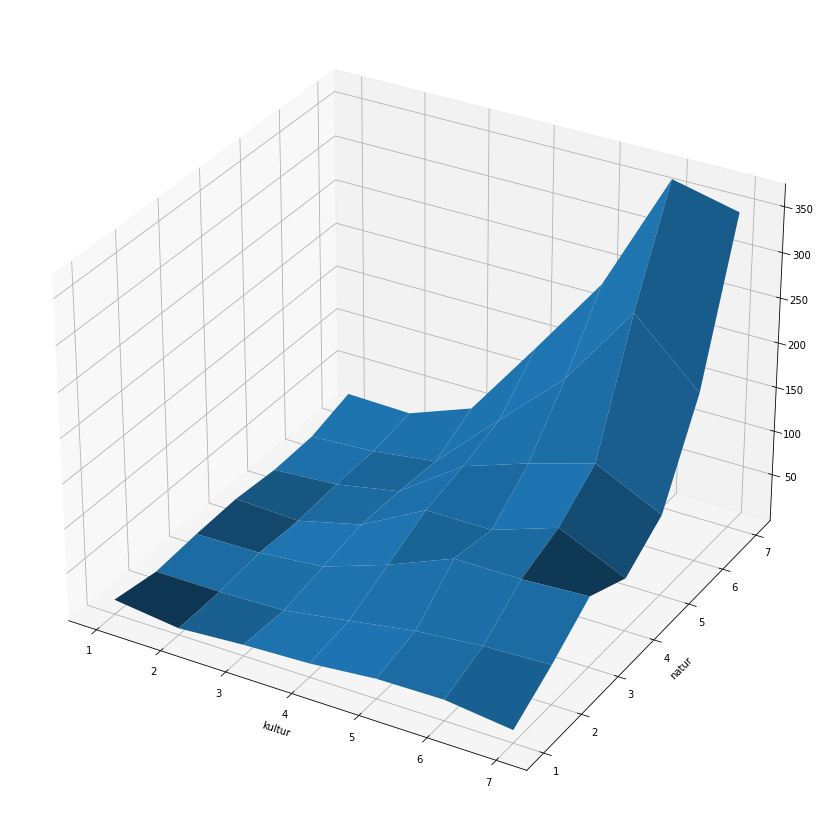

In [24]:
#3d surface plot
import matplotlib.pyplot as plt
import numpy as np
import math
X, Y = np.meshgrid(np.arange(1,8), np.arange(1,8))
Z = np.zeros((7,7))

for a,q in zip(data_2019["Q1_natur_kom_1"],data_2019["Q1_kultur_kom_1"]):
    if (not math.isnan(q)) and (not math.isnan(a)):
        Z[int(a)-1, int(q)-1] += 1

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(X, Y, Z)
ax.set_ylabel("natur")
ax.set_xlabel("kultur")
fig.savefig("figur.png")

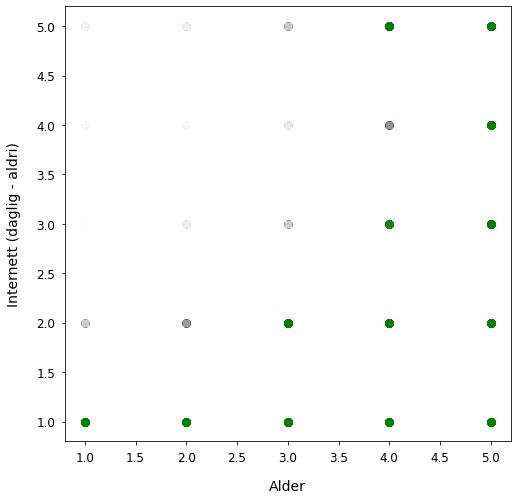

In [83]:
plt.figure(figsize=(8, 8))
plt.scatter(data["Alderkat"], data["Q62a"], c='green', s=70, alpha=0.005)
plt.ylabel("Internett (daglig - aldri)", fontsize=14, labelpad=15)
plt.xlabel("Alder", fontsize=14, labelpad=15)
plt.tick_params(labelsize=12, pad=6);

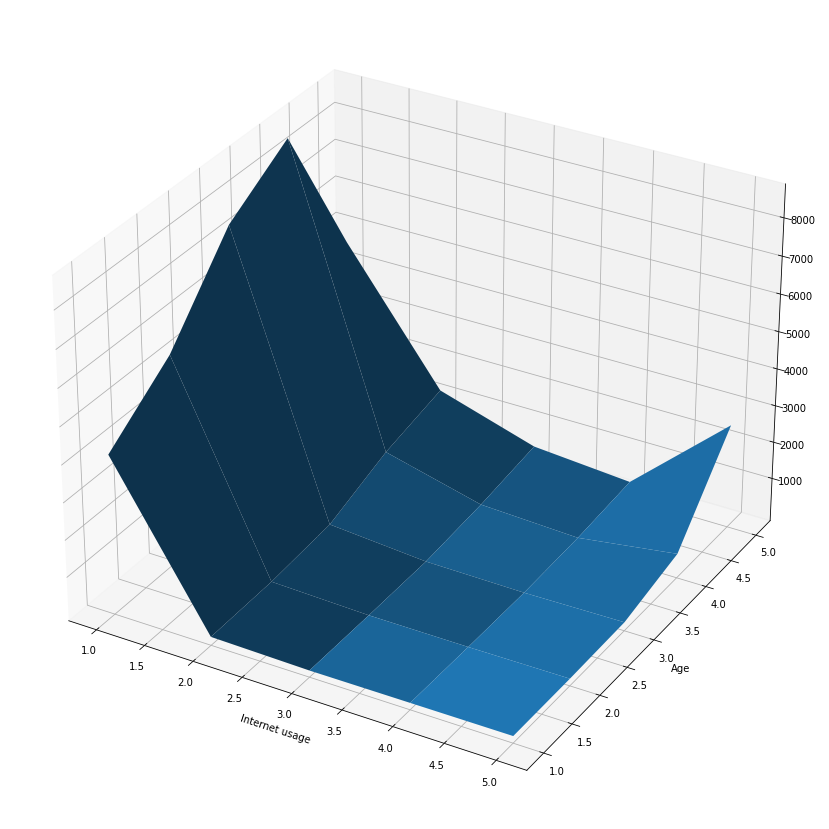

In [113]:
#3d surface plot
import numpy as np
import math
X, Y = np.meshgrid(np.arange(1,6), np.arange(1,6))
Z = np.zeros((5,5))

for a,q in zip(data["Alderkat"],data["Q62a"]):
    if not math.isnan(q):
        Z[int(a)-1, int(q)-1] += 1

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(X, Y, Z)
ax.set_ylabel("Age")
ax.set_xlabel("Internet usage")
fig.savefig("figur.png")

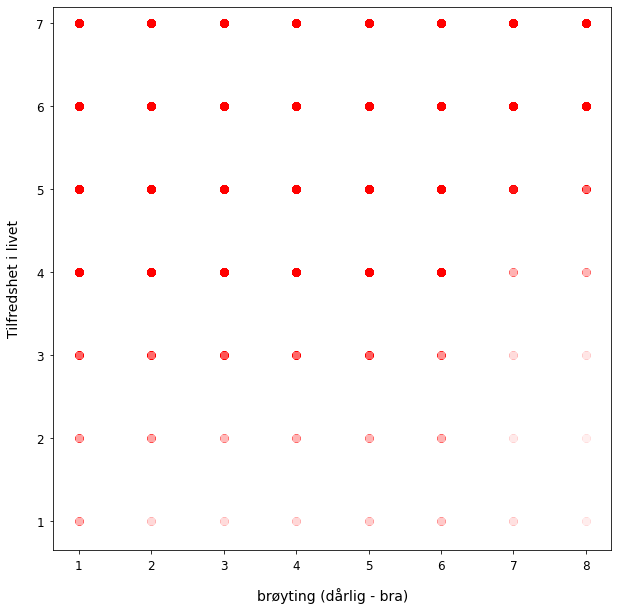

In [68]:
plt.figure(figsize=(10, 10))
plt.scatter(data["Q1_samferdsel_kom_6"], data["Q66a_1"], c='red', s=70, alpha=0.002)
plt.xlabel("brøyting (dårlig - bra)", fontsize=14, labelpad=15)
plt.ylim(top=7.2)
plt.ylabel("Tilfredshet i livet", fontsize=14, labelpad=15)
plt.tick_params(labelsize=12, pad=6);

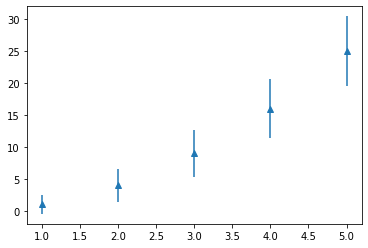

In [69]:
import numpy as np

x = np.array([1, 2, 3, 4, 5])
y = np.power(x, 2) # Effectively y = x**2
e = np.array([1.5, 2.6, 3.7, 4.6, 5.5])

plt.errorbar(x, y, e, linestyle='None', marker='^')

plt.show()

In [ ]:
 fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot([data["Alderkat"].count(str(i)) for i in data["Alderkat"]])
 
# show plot
plt.show()

In [81]:
count = pd.Series(data["Alderkat"]).value_counts()

In [82]:
print(count)

4    14627
5    12054
3    11716
2     7242
1     5212
Name: Alderkat, dtype: int64


In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(data["Q1_samferdsel_kom_6"], data["Q66a_1"], c='red', s=70, alpha=0.002)
plt.xlabel("brøyting (dårlig - bra)", fontsize=14, labelpad=15)
plt.ylim(top=7.2)
plt.ylabel("Tilfredshet i livet", fontsize=14, labelpad=15)
plt.tick_params(labelsize=12, pad=6);

# z = prosent av data["Q1_samferdsel_kom_6"] som er 